*   Data from Macromolecules 2014, 47, 6453−6461 (dx.doi.org/10.1021/ma500923r)
*   Note the order of angles are different from the original paper (mathematica code). 

```
Angle1 = -11 / 180 Pi;
Angle2 = 14 / 180 Pi;
Angle3 = 14 / 180 Pi;
Angle4 = -1.4 / 180 Pi;
Angle5 = -1.4 / 180 Pi;
Angle6 = 14 / 180 Pi;
Angle7 = 14 / 180 Pi;
Angle8 = -11 / 180 Pi;
Angle = {Angle1, Angle2, Angle3, Angle4, Angle5, Angle6, Angle7, Angle8}
```

*   In this repository, the last angle (Angle8) shall be moved to the first place. See:
```
Angle = np.deg2rad(np.array([-11, -11, 14, 14, -1.4, -1.4, 14, 14]))
```

In [1]:
import polymer_pl as pp
import scipy.constants as sc
import numpy as np

temperature = 700  # K
l = [6.951, 1.466, 2.540, 1.456, 2.967, 1.459, 2.513, 1.500]
Angle = np.array([-11, -11, 14, 14, -1.4, -1.4, 14, 14])
rotation = np.array([0, 2, 0, 1, 0, 1, 0, 2])
dihedralA_kcal_mol = np.array([[180, 0.551967], [170, 0.557568],
                               [160, 0.57842], [150, 0.743988], [140, 1.15127],
                               [130, 1.76722], [120, 2.48711], [110, 3.17616],
                               [100, 3.6976], [90, 3.93171], [80, 3.8368],
                               [70, 3.38603], [60, 2.66725], [50, 1.79179],
                               [40, 0.954215], [30, 0.334189], [20, 0.0295074],
                               [10, 0], [0, 0.00945115]])
dihedralB_kcal_mol = np.array([[180, 0.496007], [170, 0.338429],
                               [160, 0.0933325], [150, 0], [140, 0.17495],
                               [130, 0.647714], [120, 1.29963], [110, 1.9583],
                               [100, 2.45073], [90, 2.6726], [80, 2.55251],
                               [70, 2.1469], [60, 1.56547], [50, 0.979727],
                               [40, 0.572042], [30, 0.409372], [20, 0.469453],
                               [10, 0.615015], [0, 0.652945]])

# Convert energy from kcal/mol to kJ/mol
conversion_factor = sc.calorie
dihedralA = np.copy(dihedralA_kcal_mol)
dihedralA[:, 1] *= conversion_factor
dihedralB = np.copy(dihedralB_kcal_mol)
dihedralB[:, 1] *= conversion_factor
labels = {
    1: {'data': dihedralA, 'color': 'b', 'label': 'dihedarlA'},
    2: {'data': dihedralB, 'color': 'm', 'label': 'dihedralB'},
}

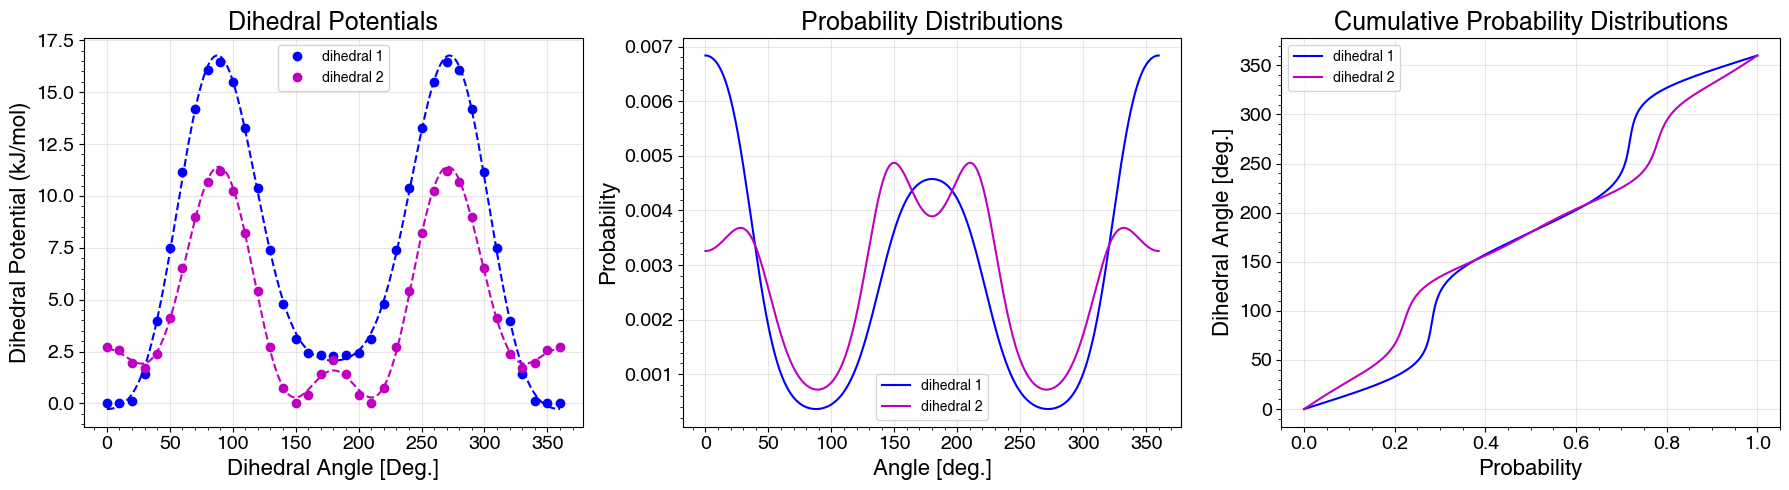

In [2]:
pFTBT = pp.PolymerPersistence(l, Angle, temperature, rotation, labels, fitting_method='cosine', param_n=5)
pFTBT.plot_dihedral_potentials()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.6s finished


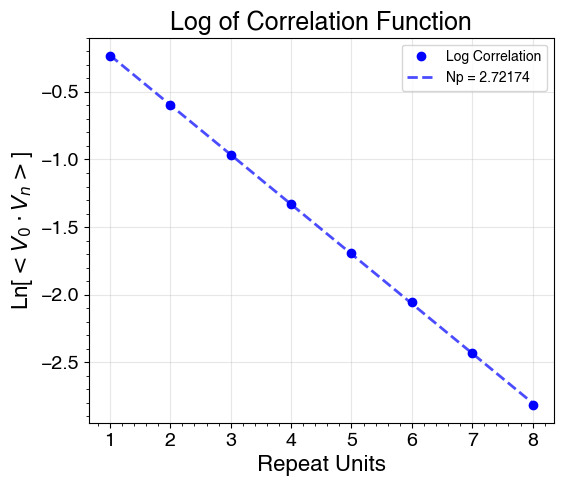

In [3]:
pFTBT.plot_correlation_function(n_repeat_units=20,
                                n_samples=50000,
                                start_idx=1,
                                end_idx=9)  # Monte Carlo method
# original paper: 2.76219

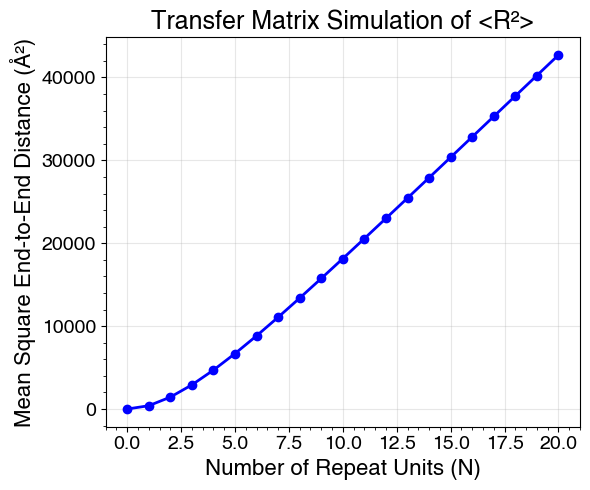

In [4]:
pFTBT.calc_mean_square_end_to_end_transfer_matrix(20) # transfer matrix method

In [3]:
pFTBT.report()  # transfer matrix method

-------------- Calculation Report -------------
Temperature: 700 K
Max Eigenvalue (lambda_max): 0.692924185631
Correlation Length: 2.726024
Persistence Length Geometric (Angstroms): 63.483860
Persistence Length WLC (Angstroms): 58.096724
-----------------------------------------------
